# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [91]:
#Import Libraries
import pandas as pd
import numpy as np
import math
import scipy.stats as spstats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
#Read Dataset
temp_df = pd.read_csv('data/human_body_temperature.csv')

In [92]:
#Review Data
temp_df.head() 

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


### Q1. Is the distribution of body temperatures normal? 

<li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.

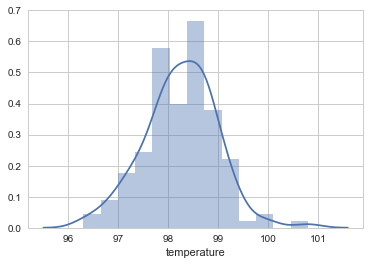

In [93]:
#Plot distribution to see if sample data is normally distributed
sns.distplot(temp_df.temperature)

### The sample is normally distributed by visually assessing the histogram.

In [94]:
#Test for normality
k2,pval=spstats.mstats.normaltest(temp_df.temperature)
print("P-Value = ",pval)

P-Value =  0.258747986349


### The sample is normally distributed as proved by the Chi Square Test for Normality.

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Q2. Is the sample size large? Are the observations independent?

<li>Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.    

In [95]:
#Get sample size
sample_size=temp_df.shape[0]
print("Sample Size =",sample_size)
if (sample_size>30):
    print('Large Sample')
else :
    print ('Small Sample')

Sample Size = 130
Large Sample


### The sample size is large with 130 observations. 

### The observations are independent since data is collected from individuals.

-----------------------------------------------------------------------------------------------------------------------------------

### Q3. Is the true population mean really 98.6 degrees F?

<li>Would you use a one-sample or two-sample test? Why?

<li>In this situation, is it appropriate to use the $t$ or $z$ statistic? 

#### Hypothesis - One Sample Test for Means - Large Sample - z-test

In [96]:
#Calculate z-statistic
xbar,stddev=temp_df.temperature.mean(),temp_df.temperature.std()
mu=98.6

zstatistic=(xbar-mu)/(stddev/math.sqrt(sample_size))
print("Z Statistic =",zstatistic)

Z Statistic = -5.454823292364079


In [97]:
#Calculate pvalue from Z Statistic = Use *2 since it is a 2 tailed test
p_value=spstats.norm.sf(abs(zstatistic))*2
print("P Value = ",p_value)

P Value =  4.90215701411e-08


In [98]:
#Calculate 2-tailed Confidence Interval - CI at 95% Confidence 
zalphaby2=spstats.norm.ppf(0.975)
MarginOfError=zalphaby2*(stddev/math.sqrt(sample_size))
zCIUpperLimit=xbar+(zalphaby2*(stddev/math.sqrt(sample_size)))
zCILowerLimit=xbar-(zalphaby2*(stddev/math.sqrt(sample_size)))
print("Confidence Interval of 2 tailed z test at 95% confidence - (",round(zCILowerLimit,2),"F,",round(zCIUpperLimit,2),"F )")

Confidence Interval of 2 tailed z test at 95% confidence - ( 98.12 F, 98.38 F )


### Reject Null Hypothesis : True Population Mean is not 98.6 degrees F.

<li>Now try using the other test. How is the result be different? Why?

In [99]:
#Calculate t-statistic - z-test for means and t-test for means have same test statistic
tstatistic=(xbar-mu)/(stddev/math.sqrt(sample_size))
print("t Statistic =",tstatistic)

t Statistic = -5.454823292364079


In [100]:
#At level of significance=0.05, with dof=129, calculate talpha for 2 sided test.
talphaby2=spstats.t.ppf(1-0.025, 129)
print("T at Level of Significance 0.05 = ",talphaby2)

T at Level of Significance 0.05 =  1.97852449146


In [101]:
#Calculate 2-tailed Confidence Interval - CI at 95% Confidence 
talphaby2=spstats.t.ppf(1-0.025, sample_size-1)
tCIUpperLimit=xbar+(zalphaby2*(stddev/math.sqrt(sample_size)))
tCILowerLimit=xbar-(zalphaby2*(stddev/math.sqrt(sample_size)))
print("Confidence Interval of 2 tailed z test at 95% confidence - (",round(tCILowerLimit,2),"F,",round(tCIUpperLimit,2),"F )")

Confidence Interval of 2 tailed z test at 95% confidence - ( 98.12 F, 98.38 F )


### We get the same CI for t and z at 95% confidence since at sample size greater than 30 t distribution becomes normal.

--------------------------------------------------------------------------------------------------------------------------------

### Q4. At what temperature should we consider someone's temperature to be "abnormal"?

<li>Start by computing the margin of error and confidence interval.

In [102]:
print("Margin Of Error =",MarginOfError)
print("Confidence Interval of 2 tailed z test at 95% confidence - (",round(zCILowerLimit,2),"F,",round(zCIUpperLimit,2),"F )")

Margin Of Error = 0.126034341049
Confidence Interval of 2 tailed z test at 95% confidence - ( 98.12 F, 98.38 F )


### Temperature is considered abnormal outside the range (98.12 F, 98.38 F)

---------------------------------------------------------------------------------------------------------------------------------

### Q5. Is there a significant difference between males and females in normal temperature?

<li>What test did you use and why?

In [103]:
#Check sample size for males and females
temp_df.gender.value_counts()

F    65
M    65
Name: gender, dtype: int64

In [104]:
#Split dataset into male and female groups
males=temp_df[temp_df.gender=='M']
females=temp_df[temp_df.gender=='F']

#### Hypothesis - Two Sample Test for Means - Large Sample - Indepedent - z-test

In [105]:
#Calculate z-statistic
mxbar,mstddev=males.temperature.mean(),males.temperature.std()
fxbar,fstddev=females.temperature.mean(),females.temperature.std()
zstatistic=(mxbar-fxbar)/(math.sqrt(((mstddev**2)/males.size)+((fstddev**2)/females.size)))
print("Z Statistic =",zstatistic)

Z Statistic = -3.9584887374749673


In [106]:
#Calculate pvalue from Z Statistic = Use *2 since it is a 2 tailed test
p_value=spstats.norm.sf(abs(zstatistic))*2
print("P Value = ",p_value)

P Value =  7.5425496979e-05


<li>Write a story with your conclusion in the context of the original problem.